In [2]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock#,
    #xaxis_rangeslider_visible=True
                     )
    fig.update_xaxes(rangeslider= {'visible':True}, row=1, col=1)
    fig.update_xaxes(rangeslider= {'visible':True}, row=2, col=1)
    fig.show()

In [5]:
Tesla = yf.Ticker('TSLA')

In [6]:
tesla_data = Tesla.history(period = "max")
print(tesla_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-08-24  238.660004  238.919998  228.179993  230.039993   99777400   
2023-08-25  231.309998  239.000000  230.350006  238.589996  106345900   
2023-08-28  242.580002  244.380005  235.350006  238.820007  107673700   
2023-08-29  238.580002  257.480011  237.770004  257.179993  134047600   
2023-08-30  254.199997  260.510010  250.589996  256.899994  121833800   

            Dividends  Stock Splits  
Date        

In [7]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [8]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
#print(html_data)

In [9]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>403 Forbidden</title>]

In [10]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    #import re if sub method is used
    #revenue = re.sub(',|\$','',col[1].text)

    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
print(tesla_revenue)

IndexError: list index out of range

In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('\,|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [13]:
tesla_revenue.tail()

,Date,Revenue


In [15]:
GameStop = yf.Ticker("GME")

In [16]:
gme_data = GameStop.history(period = 'max')

In [17]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [18]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [19]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>403 Forbidden</title>]

In [29]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[5].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[5].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

IndexError: list index out of range

In [21]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

IndexError: list index out of range

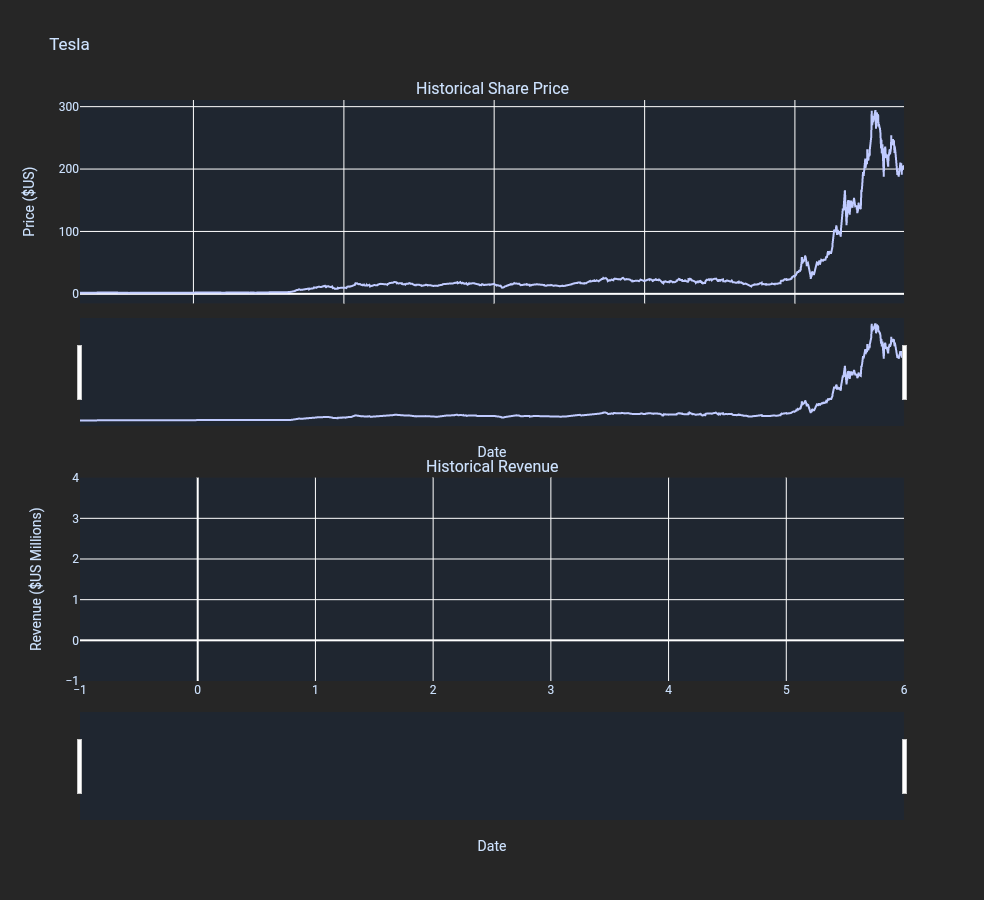

In [24]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

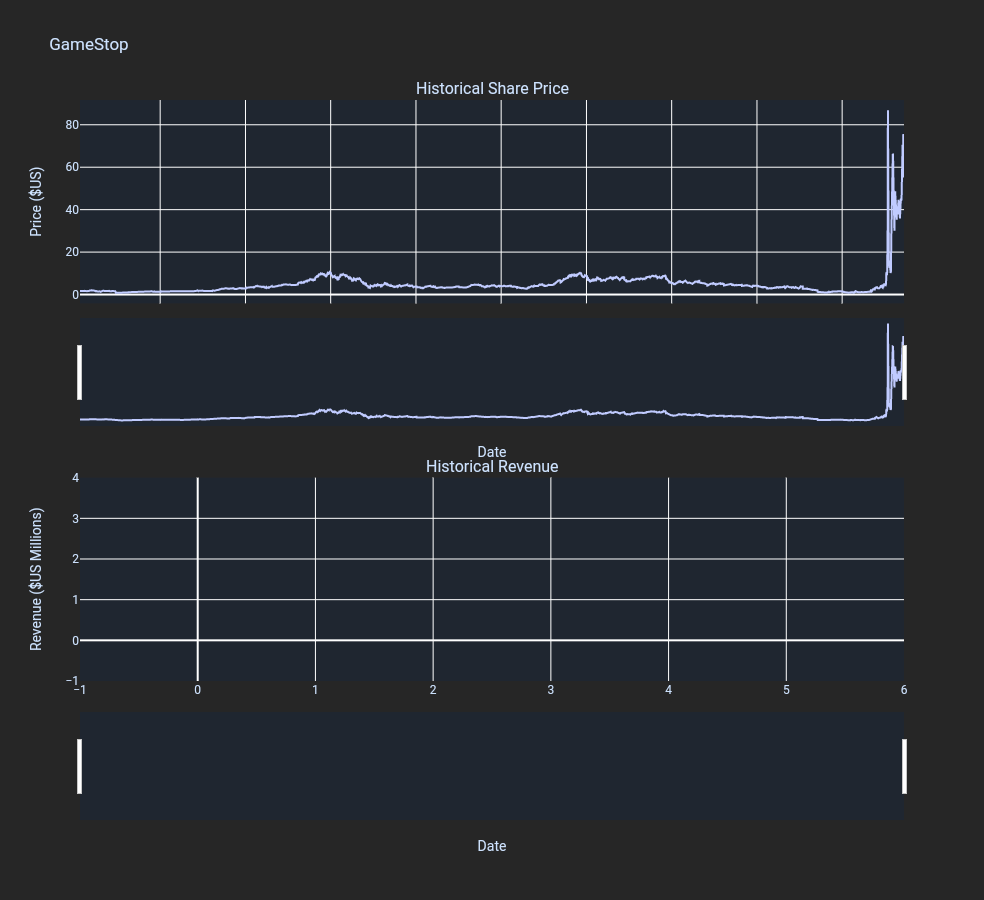

In [23]:
make_graph(gme_data, gme_revenue, 'GameStop')

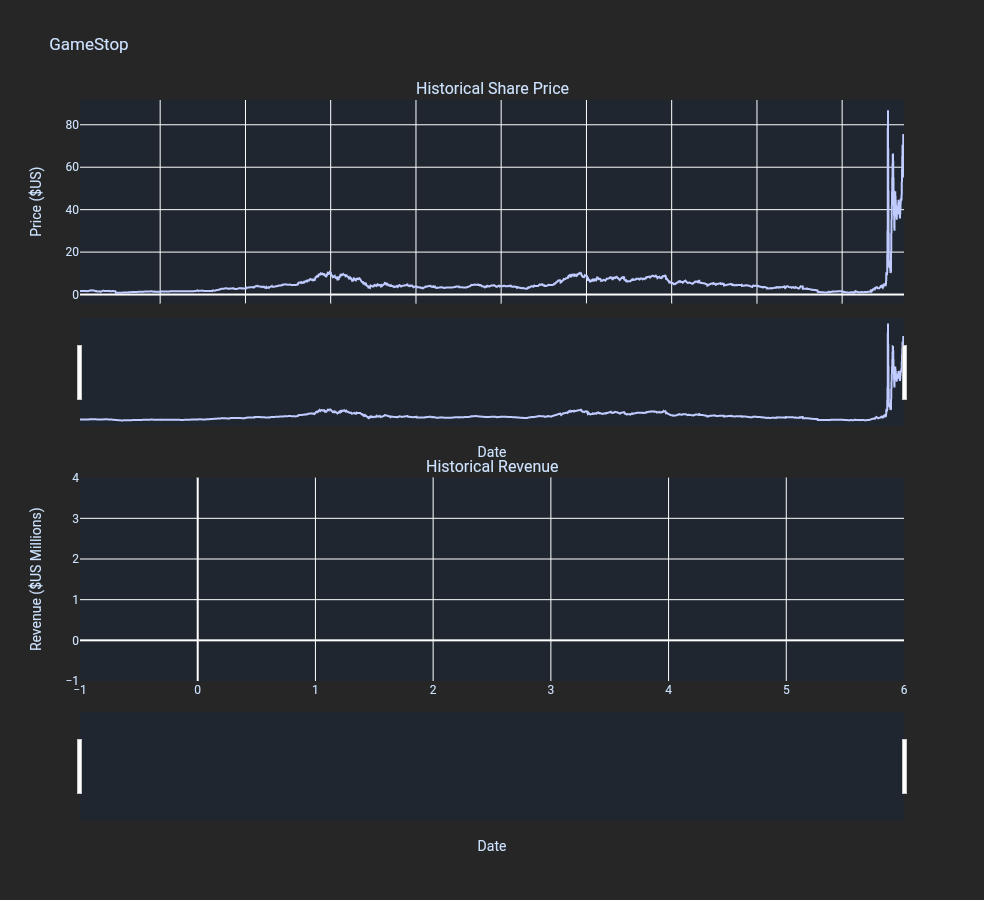

In [25]:
make_graph(gme_data, gme_revenue, 'GameStop')